In [1]:
import pandas as pd 

data = pd.read_csv('C:\\Users\\lclai\\Desktop\\datamimic\\patients_dementia.csv')
vital_signs = pd.read_csv('C:\\Users\\lclai\\Desktop\\datamimic\\vital_signs.csv')

In [2]:
data['DEMENTIA'].value_counts()

DEMENTIA
0    44745
1     3404
Name: count, dtype: int64

In [4]:
df = pd.merge(data, vital_signs, on='HADM_ID', how='left')
df.head(10)

,SUBJECT_ID_x,AGE,GENDER,DEMENTIA,HADM_ID,LAST_ADMISSION_LENGTH,ETHNICITY,MARITAL_STATUS,HYPERTENSION,ATRIAL_FIBRILLATION,...,KIDNEY_DISEASE,ACIDOSIS,HYPERTENSION_KIDNEY,SUBJECT_ID_y,HEART_RATE,RESPIRATORY_RATE,DIASTOLIC_BP,SYSTOLIC_BP,MEAN_BP,OXYGEN_SATURATION
0,31,72,M,1,128652,8,WHITE,MARRIED,1,0,...,0,0,0,31.0,NaN,NaN,NaN,NaN,NaN,NaN
1,59,87,F,1,104130,5,WHITE,OTHER,0,0,...,0,0,0,59.0,NaN,NaN,NaN,NaN,NaN,NaN
2,63,88,M,1,195961,0,WHITE,OTHER,0,0,...,0,0,0,63.0,NaN,NaN,NaN,NaN,NaN,NaN
3,67,73,M,1,155252,0,WHITE,UNMARRIED,1,0,...,0,1,0,67.0,NaN,NaN,NaN,NaN,NaN,NaN
4,67,70,M,1,186474,9,WHITE,UNMARRIED,1,0,...,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,98,40,F,1,188606,7,WHITE,MARRIED,0,0,...,0,0,0,98.0,NaN,NaN,NaN,NaN,NaN,NaN
6,109,24,F,1,102024,16,BLACK,UNMARRIED,0,0,...,0,0,0,109.0,131.0,40.0,197.0,193.0,269.0,100.0
7,109,22,F,1,108375,0,BLACK,UNMARRIED,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,109,23,F,1,110668,8,BLACK,UNMARRIED,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,109,24,F,1,113189,3,BLACK,UNMARRIED,0,0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df = df.drop(columns=['SUBJECT_ID_y','DIASTOLIC_BP','SYSTOLIC_BP'])
df = df.rename(columns={'SUBJECT_ID_x': 'SUBJECT_ID'})

In [9]:
df = df.drop(columns=['RESPIRATORY_RATE','MEAN_BP','OXYGEN_SATURATION','HEART_RATE'])
df.isnull().sum()

SUBJECT_ID                  0
AGE                         0
GENDER                      0
DEMENTIA                    0
HADM_ID                     0
LAST_ADMISSION_LENGTH       0
ETHNICITY                   0
MARITAL_STATUS              0
HYPERTENSION                0
ATRIAL_FIBRILLATION         0
KIDNEY_FAILURE              0
UTI                         0
HEART_FAILURE               0
RESPIRATORY_FAILURE         0
PNEUMONITIS                 0
DIABETES                    0
CORONARY_ATHEROSCLEROSIS    0
HYPOTHYROIDISM              0
ANEMIA                      0
SEPSIS                      0
HYPERLIPIDEMIA              0
PNEUMONIA                   0
HYPEROSMOLALITY             0
SEVERE_SEPSIS               0
HYPERCHOLESTEROLEMIA        0
ESOPHAGEAL_REFLUX           0
KIDNEY_DISEASE              0
ACIDOSIS                    0
HYPERTENSION_KIDNEY         0
dtype: int64

In [10]:
#undersampling pareando por edad y sexo

import pandas as pd

df_alzheimer = df[df['DEMENTIA'] == 1]
df_no_alzheimer = df[df['DEMENTIA'] == 0]

df_no_alzheimer_sampled = pd.DataFrame()

for (age, gender), group in df_alzheimer.groupby(['AGE', 'GENDER']):
 
    matched_controls = df_no_alzheimer[(df_no_alzheimer['AGE'] == age) & (df_no_alzheimer['GENDER'] == gender)]
    
    if len(matched_controls) > len(group):
        matched_controls = matched_controls.sample(n=len(group), random_state=42)
    
    df_no_alzheimer_sampled = pd.concat([df_no_alzheimer_sampled, matched_controls])

df_balanced = pd.concat([df_alzheimer, df_no_alzheimer_sampled])

df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)



In [11]:
df_balanced = df_balanced.drop(columns=['SUBJECT_ID', 'HADM_ID'])
df_balanced['GENDER'] = df_balanced['GENDER'].map({'M': 1, 'F': 0})

binary = ['GENDER','DEMENTIA','HYPERTENSION', 'ATRIAL_FIBRILLATION',
       'KIDNEY_FAILURE', 'UTI', 'HEART_FAILURE', 'RESPIRATORY_FAILURE',
       'PNEUMONITIS', 'DIABETES', 'CORONARY_ATHEROSCLEROSIS', 'HYPOTHYROIDISM',
       'ANEMIA', 'SEPSIS', 'HYPERLIPIDEMIA', 'PNEUMONIA', 'HYPEROSMOLALITY',
       'SEVERE_SEPSIS', 'HYPERCHOLESTEROLEMIA', 'ESOPHAGEAL_REFLUX',
       'KIDNEY_DISEASE', 'ACIDOSIS', 'HYPERTENSION_KIDNEY']
categorical = ['ETHNICITY','MARITAL_STATUS']
numerical = ['LAST_ADMISSION_LENGTH','AGE']

In [12]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()
scaler = StandardScaler()

for col in binary + categorical:
    df_balanced[col] = le.fit_transform(df_balanced[col]) 

df_balanced[numerical] = scaler.fit_transform(df_balanced[numerical])
df_balanced

,AGE,GENDER,DEMENTIA,LAST_ADMISSION_LENGTH,ETHNICITY,MARITAL_STATUS,HYPERTENSION,ATRIAL_FIBRILLATION,KIDNEY_FAILURE,UTI,...,SEPSIS,HYPERLIPIDEMIA,PNEUMONIA,HYPEROSMOLALITY,SEVERE_SEPSIS,HYPERCHOLESTEROLEMIA,ESOPHAGEAL_REFLUX,KIDNEY_DISEASE,ACIDOSIS,HYPERTENSION_KIDNEY
0,0.096870,0,0,-0.770050,2,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0.221703,0,1,0.009200,1,2,1,1,1,1,...,0,1,0,0,1,0,0,1,0,1
2,0.596202,0,1,-0.185613,2,1,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,-0.652127,0,0,-0.283019,2,2,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,-1.276292,0,0,-0.477831,0,2,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6803,-1.401125,0,0,2.639167,2,1,0,0,1,1,...,0,0,1,0,0,0,0,1,0,0
6804,0.346536,1,0,-0.477831,2,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
6805,0.408953,0,0,0.106606,1,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6806,0.471369,1,0,-0.770050,2,0,1,0,0,0,...,0,0,0,0,0,1,1,1,0,0


In [13]:
from sklearn.model_selection import train_test_split

X = df_balanced.drop(columns=['DEMENTIA']) 
y = df_balanced['DEMENTIA']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import roc_auc_score

models = {
    'Logistic Regression': LogisticRegression(solver='liblinear', random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42)
}

param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10],  
        'penalty': ['l2'], 
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200], 
        'max_depth': [None, 10, 20], 
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],  
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],  
        'learning_rate': [0.01, 0.1, 0.2], 
        'max_depth': [3, 6, 10],
        'subsample': [0.8, 1.0], 
    }
}

results = {}

for model_name in models:
    model = models[model_name]
    param_grid = param_grids[model_name]
    
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
    
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    
    y_pred_proba = best_model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_proba)
    
    results[model_name] = {
        'best_params': grid_search.best_params_,
        'mean_auc': auc,
        'best_model': best_model
    }

for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Best Params: {result['best_params']}")
    print(f"Mean AUC: {result['mean_auc']:.4f}\n")


Model: Logistic Regression
Best Params: {'C': 0.1, 'penalty': 'l2'}
Mean AUC: 0.6140

Model: Random Forest
Best Params: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mean AUC: 0.7433

Model: XGBoost
Best Params: {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.8}
Mean AUC: 0.7051



In [15]:
#more tunning

rf_model = RandomForestClassifier(random_state=42)

param_grid_rf = {
    'n_estimators': [300, 500, 1000],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt'],
    'criterion': ['entropy']
}

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

best_rf_model = grid_search_rf.best_estimator_
y_pred_proba_rf = best_rf_model.predict_proba(X_test)[:, 1]
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

print(f"Best Params for Random Forest: {grid_search_rf.best_params_}")
print(f"Mean AUC for Random Forest: {auc_rf:.4f}")


Best Params for Random Forest: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}
Mean AUC for Random Forest: 0.7449


In [16]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = best_rf_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.65      0.67      1022
           1       0.67      0.70      0.68      1021

    accuracy                           0.67      2043
   macro avg       0.67      0.67      0.67      2043
weighted avg       0.67      0.67      0.67      2043

[[664 358]
 [307 714]]


In [17]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='roc_auc')
print(f"Cross-validated AUC scores: {cv_scores}")
print(f"Mean AUC from cross-validation: {cv_scores.mean()}")

Cross-validated AUC scores: [0.73057493 0.75296408 0.76239584 0.75627169 0.77209846]
Mean AUC from cross-validation: 0.7548610010041753


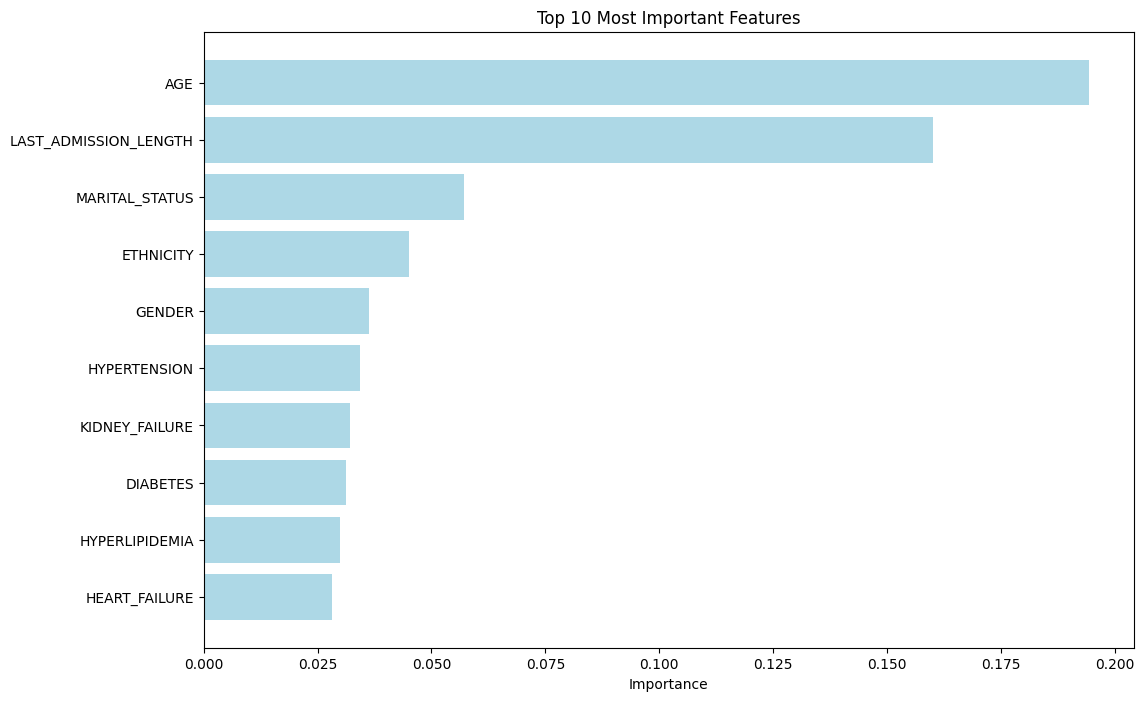

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

feature_importances = best_rf_model.feature_importances_

features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(importance_df.head(10)['Feature'], importance_df.head(10)['Importance'], color='lightblue')
plt.xlabel('Importance')
plt.title('Top 10 Most Important Features')
plt.gca().invert_yaxis()  
plt.show()